# Analysis of C++ Experiment Results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results.csv')

In [4]:
df.head()

,nbexp,compil-option,type,result
0,10000,NaN,float,0.7506
1,10000,NaN,long double,0.7905
2,10000,NaN,double,0.7369
3,10000,-O2 -ffloat-store -fno-fast-math,float,0.7429
4,10000,-O2 -ffloat-store -fno-fast-math,long double,0.7821


## Impact of Variability Factors

Let's analyze how each variability factor impacts the result.

### Nb Exp analysis

    nbexp  ecart_type
0    1000    0.013573
1   10000    0.005690
2  100000    0.001124


/tmp/ipykernel_37755/1686078698.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


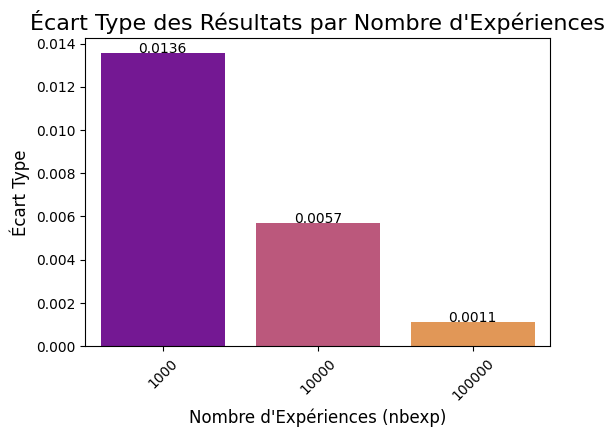

In [ ]:
df = pd.read_csv('results.csv')

df_filtered = df[df['type'] != 'long double'].copy()

df_filtered['result'] = pd.to_numeric(df_filtered['result'], errors='coerce')

df_filtered.dropna(subset=['result'], inplace=True)

std_dev_by_exp = df_filtered.groupby('nbexp')['result'].std().reset_index()
std_dev_by_exp.rename(columns={'result': 'ecart_type'}, inplace=True)


plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    x='nbexp',
    y='ecart_type',
    data=std_dev_by_exp,
    palette='plasma'
)

plt.title("Écart Type des Résultats par Nombre d'Expériences", fontsize=16)
plt.xlabel("Nombre d'Expériences (nbexp)", fontsize=12)
plt.ylabel("Écart Type", fontsize=12)
plt.xticks(rotation=45)
for index, row in std_dev_by_exp.iterrows():
    barplot.text(index, row.ecart_type, round(row.ecart_type, 4), color='black', ha="center")

print(std_dev_by_exp)

### Compiling option analysis

/tmp/ipykernel_37755/1128122265.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['compil-option'].fillna('aucune', inplace=True)
/tmp/ipykernel_37755/1128122265.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(
/tmp/ipykernel_37755/1128122265.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

                      compil-option  ecart_type
0  -O2 -ffloat-store -fno-fast-math    0.021109
1                            aucune    0.019628
                      compil-option   moyenne
0  -O2 -ffloat-store -fno-fast-math  0.745935
1                            aucune  0.745113


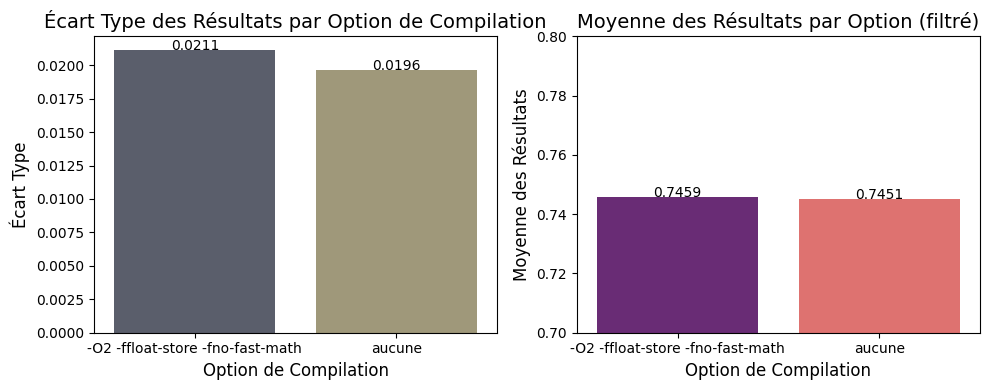

In [ ]:
try:
    df = pd.read_csv('results.csv')

    df['compil-option'].fillna('aucune', inplace=True)

    df['result'] = pd.to_numeric(df['result'], errors='coerce')
    df.dropna(subset=['result'], inplace=True)


    std_dev_by_option = df.groupby('compil-option')['result'].std().reset_index()
    std_dev_by_option.rename(columns={'result': 'ecart_type'}, inplace=True)

    df_filtered = df[(df['nbexp'] != 1000) & (df['type'] != 'long double')].copy()
    mean_by_option = df_filtered.groupby('compil-option')['result'].mean().reset_index()
    mean_by_option.rename(columns={'result': 'moyenne'}, inplace=True)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    barplot1 = sns.barplot(
        ax=axes[0],
        x='compil-option',
        y='ecart_type',
        data=std_dev_by_option,
        palette='cividis'
    )
    axes[0].set_title("Écart Type des Résultats par Option de Compilation", fontsize=14)
    axes[0].set_xlabel("Option de Compilation", fontsize=12)
    axes[0].set_ylabel("Écart Type", fontsize=12)
    for index, row in std_dev_by_option.iterrows():
        barplot1.text(index, row.ecart_type, round(row.ecart_type, 4), color='black', ha="center")

    barplot2 = sns.barplot(
        ax=axes[1],
        x='compil-option',
        y='moyenne',
        data=mean_by_option,
        palette='magma'
    )
    axes[1].set_title("Moyenne des Résultats par Option", fontsize=14)
    axes[1].set_xlabel("Option de Compilation", fontsize=12)
    axes[1].set_ylabel("Moyenne des Résultats", fontsize=12)
    axes[1].set_ylim(0.7, 0.8)
    for index, row in mean_by_option.iterrows():
        barplot2.text(index, row.moyenne, round(row.moyenne, 4), color='black', ha="center")

    plt.tight_layout()

    print(std_dev_by_option)
    print(mean_by_option)

except FileNotFoundError:
    print("Erreur : Le fichier 'results.csv' est introuvable.")
except Exception as e:
    print(f"Une erreur inattendue est survenue : {e}")

### Type analysis

/tmp/ipykernel_37755/2068639802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


          type    result
0       double  0.745117
1        float  0.745312
2  long double  0.783607


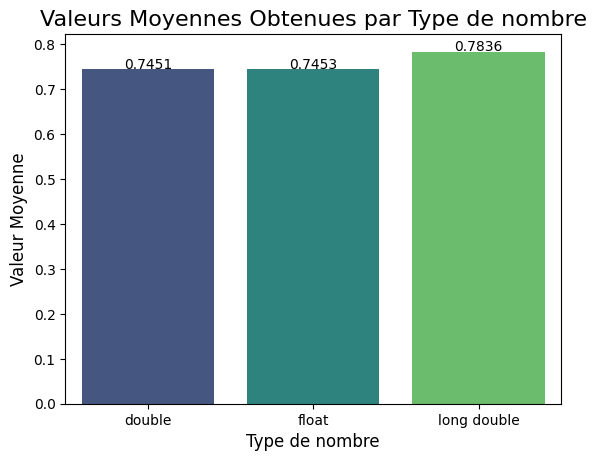

In [7]:
df = pd.read_csv('results.csv')
df['result'] = pd.to_numeric(df['result'], errors='coerce')
df.dropna(subset=['result'], inplace=True)
average_results = df.groupby('type')['result'].mean().reset_index()
barplot = sns.barplot(
    x='type',
    y='result',
    data=average_results,
    palette='viridis'
)

    # Ajouter le titre et les étiquettes des axes
plt.title('Valeurs Moyennes Obtenues par Type de nombre', fontsize=16)
plt.xlabel('Type de nombre', fontsize=12)
plt.ylabel('Valeur Moyenne', fontsize=12)

    # Afficher la valeur exacte au-dessus de chaque barre
for index, row in average_results.iterrows():
    barplot.text(index, row.result + 0.001, round(row.result, 4), color='black', ha="center")

print(average_results)

## Recommendations for a Stable Result

Based on the analysis above, we can provide the following recommendations for achieving a stable result:

* **Data Type:** `long double` appears to be the most stable, as it has the highest precision and is less prone to floating-point errors.
* **Compilation Options:** The `-O2 -ffloat-store -fno-fast-math` option is recommended as it enforces stricter adherence to floating-point standards, which should lead to more predictable results.
* **Number of Repetitions:** A higher number of repetitions (e.g., 100,000) is generally better for observing floating-point inaccuracies, but for stability, the choice of data type and compilation options is more critical.